# **Project:- Bank Customer Churn Prediction**

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Upload Datasets**

In [ ]:
bank = pd.read_csv('/content/Churn_Modelling.csv')

# **Data Structure Analysis**

In [ ]:
bank.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [ ]:
bank.tail(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
bank.shape

(10000, 14)

In [ ]:
bank.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

# **Identifying the Missing Values**

In [ ]:
bank.duplicated().sum()

0

In [ ]:
bank.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# **Descriptive Stastitics**

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
bank.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# **Data Cleaning Process**

In [ ]:
bank.drop(columns='RowNumber',inplace=True)

In [ ]:
bank.head(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


# **New DataFrame**

In [ ]:
bank_2 = bank.copy()

# **Categorical Analysis of Data**

Text(0.5, 1.0, 'In-Active Customer Contribution')

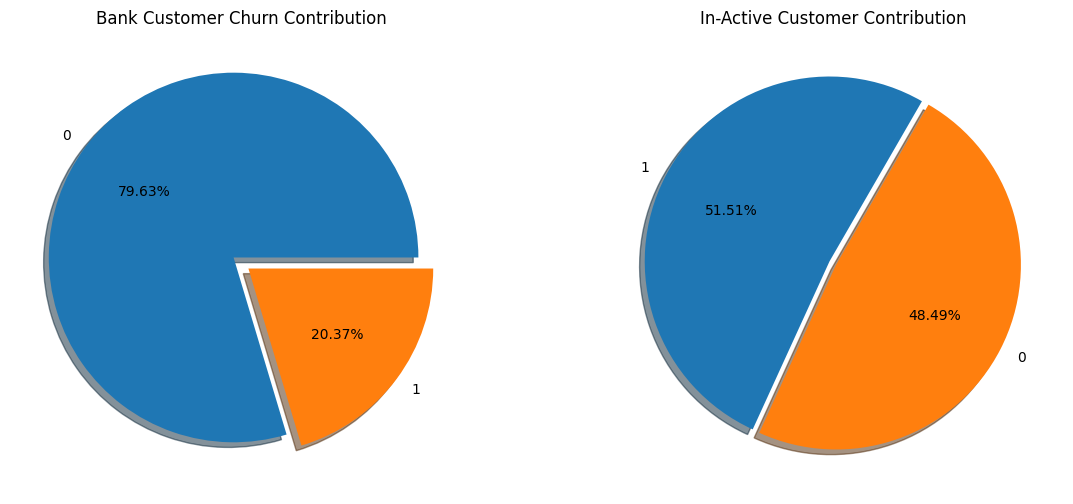

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.pie(x=bank_2['Exited'].value_counts(),autopct="%1.2f%%",labels=bank_2['Exited'].value_counts().index,explode=len(bank_2['Exited'].value_counts())*[0.05],shadow=True)
plt.title('Bank Customer Churn Contribution')
plt.subplot(1,2,2)
plt.pie(x=bank_2['IsActiveMember'].value_counts(),autopct='%1.2f%%',labels=bank_2['IsActiveMember'].value_counts().index,explode=len(bank_2['IsActiveMember'].value_counts())*[0.02],shadow=True,startangle=60)
plt.title('In-Active Customer Contribution')

Text(0.5, 1.0, 'Gender Contribution')

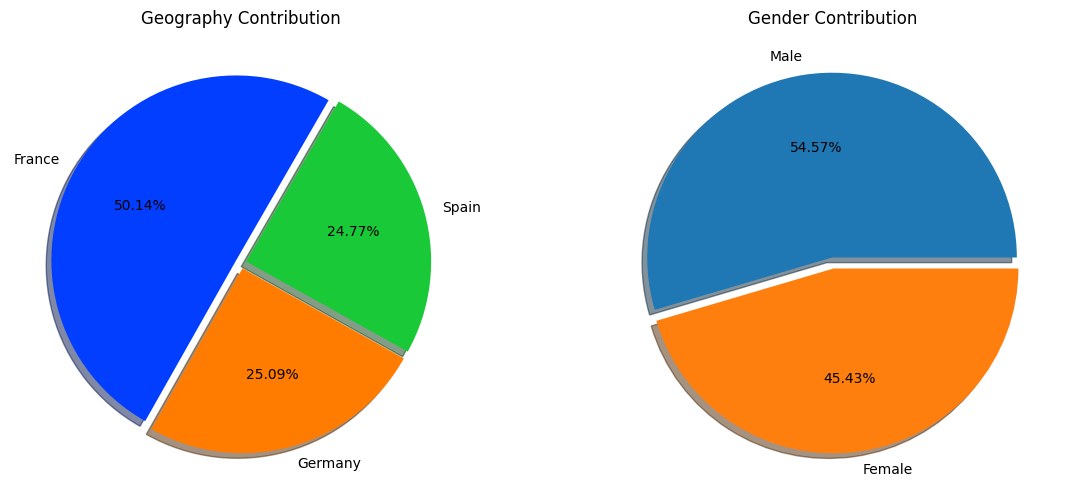

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.pie(x=bank_2['Geography'].value_counts(),autopct='%1.2f%%',labels=bank_2['Geography'].value_counts().index,explode=len(bank_2['Geography'].value_counts())*[0.03],shadow=True,startangle=60,colors=sns.color_palette('bright'))
plt.title('Geography Contribution')
plt.subplot(1,2,2)
plt.pie(x=bank_2['Gender'].value_counts(),autopct='%1.2f%%',labels=bank_2['Gender'].value_counts().index,explode=len(bank_2['Gender'].value_counts())*[0.03],shadow=True)
plt.title('Gender Contribution')

Text(0.5, 1.0, 'Credit Card Contribution')

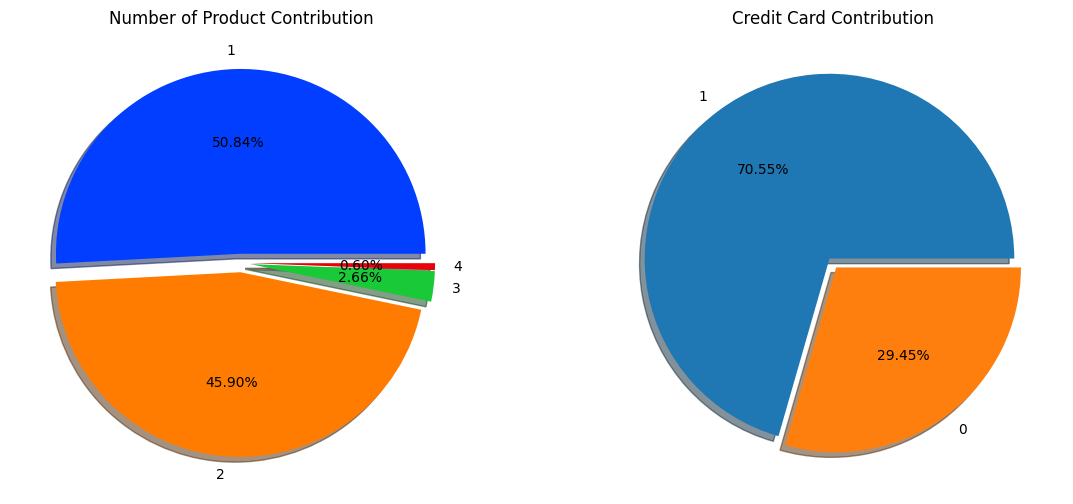

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.pie(x=bank_2['NumOfProducts'].value_counts(),autopct='%1.2f%%',labels=bank_2['NumOfProducts'].value_counts().index,explode=len(bank_2['NumOfProducts'].value_counts())*[0.05],shadow=True,colors=sns.color_palette('bright'))
plt.title('Number of Product Contribution')
plt.subplot(1,2,2)
plt.pie(x=bank_2['HasCrCard'].value_counts(),autopct='%1.2f%%',labels=bank_2['HasCrCard'].value_counts().index,explode=len(bank_2['HasCrCard'].value_counts())*[0.03],shadow=True)
plt.title('Credit Card Contribution')

Text(0.5, 1.0, 'Geography Contribution')

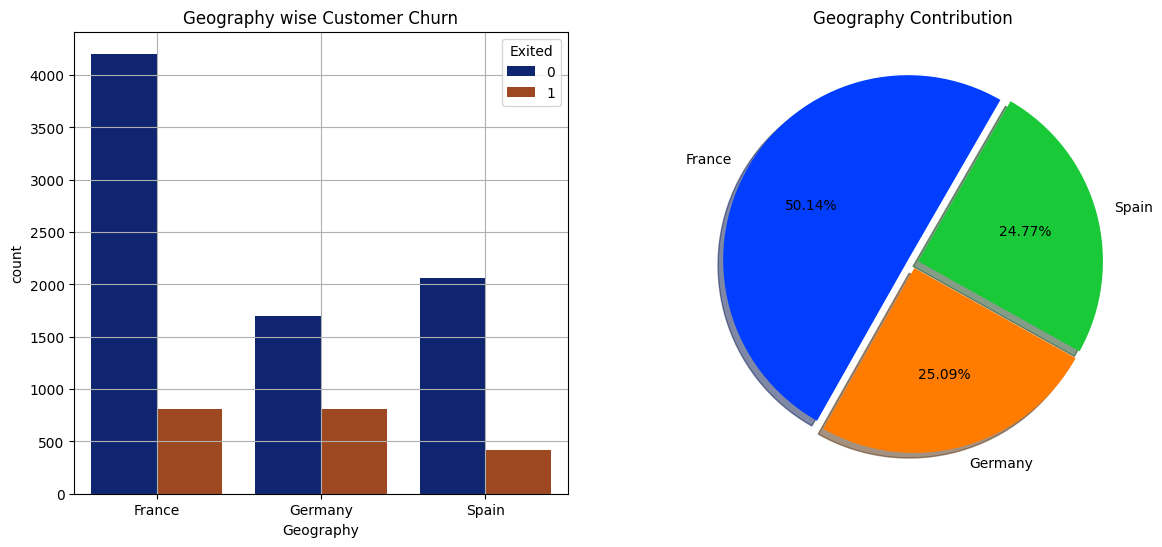

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.countplot(data=bank_2,x=bank_2['Geography'],order=bank_2['Geography'].value_counts().index,hue=bank_2['Exited'],palette='dark')
plt.title('Geography wise Customer Churn')
plt.grid()
plt.subplot(1,2,2)
plt.pie(x=bank_2['Geography'].value_counts(),autopct='%1.2f%%',labels=bank_2['Geography'].value_counts().index,explode=len(bank_2['Geography'].value_counts())*[0.03],shadow=True,startangle=60,colors=sns.color_palette('bright'))
plt.title('Geography Contribution')

Text(0.5, 1.0, 'Age Distrubution')

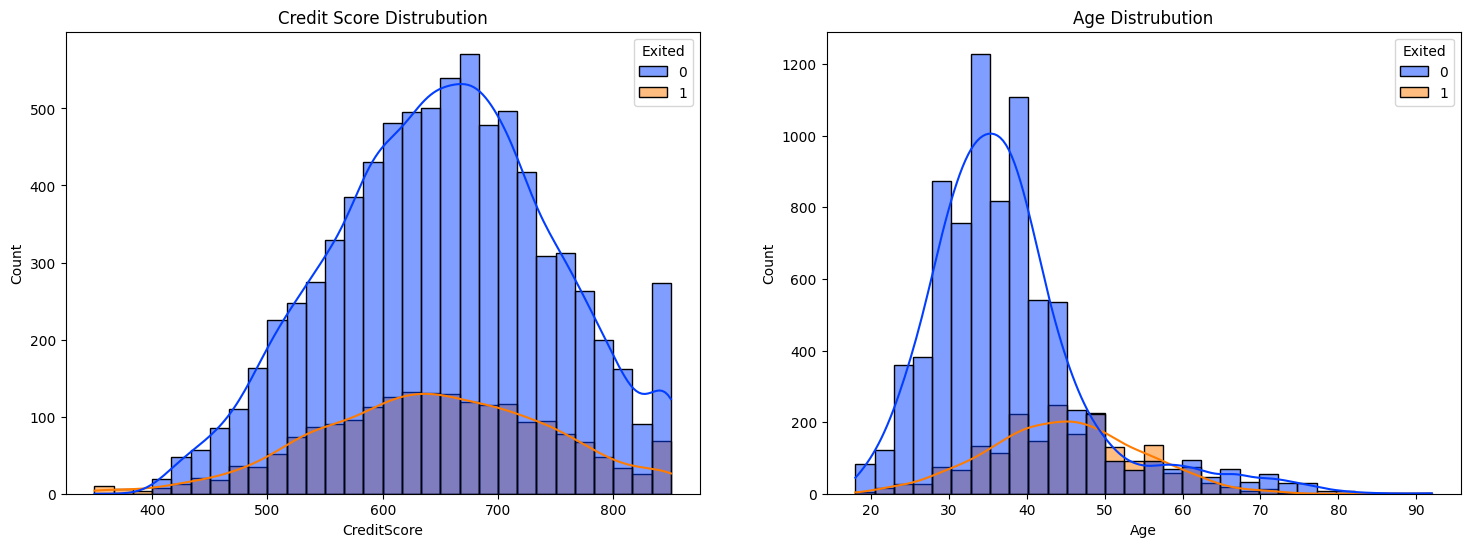

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.histplot(data=bank_2,x=bank_2['CreditScore'],bins=30,kde=True,hue=bank_2['Exited'],palette='bright')
plt.title('Credit Score Distrubution')
plt.subplot(1,2,2)
sns.histplot(data=bank_2,x=bank_2['Age'],bins=30,kde=True,hue=bank_2['Exited'],palette='bright')
plt.title('Age Distrubution')

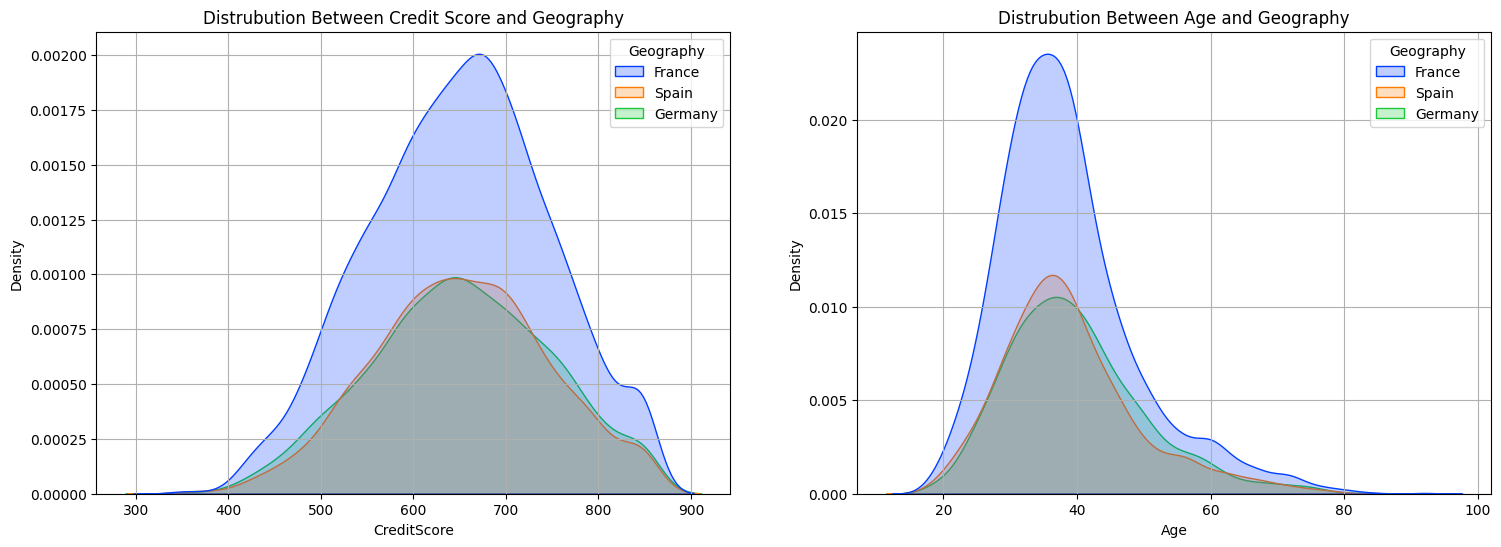

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.kdeplot(data=bank_2,x=bank_2['CreditScore'],hue=bank_2['Geography'],fill=True,palette='bright')
plt.title('Distrubution Between Credit Score and Geography')
plt.grid()
plt.subplot(1,2,2)
sns.kdeplot(data=bank_2,x=bank_2['Age'],hue=bank_2['Geography'],fill=True,palette='bright')
plt.title('Distrubution Between Age and Geography')
plt.grid()

# **Data Preprocessing**

In [ ]:
bank_2.drop(columns='CustomerId',inplace=True)

In [ ]:
bank_2.drop(columns='Surname',inplace=True)

# **Data Preprocessing and Label Encoding**

*Geography Unique Values*

In [ ]:
bank_2['Geography'].value_counts().reset_index().sort_values(by='Geography')

,Geography,count
0,France,5014
1,Germany,2509
2,Spain,2477


In [ ]:
from sklearn import preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
bank_2.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [ ]:
bank_2['Geography'] = le.fit_transform(bank_2['Geography'])

In [ ]:
bank_2['Gender'] = le.fit_transform(bank_2['Gender'])

# **Correlation Building**

In [ ]:
correlation = bank_2.corr()

In [ ]:
correlation

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


**Plot Heat Map Graph**

Text(0.5, 1.0, 'Heat Map Graph')

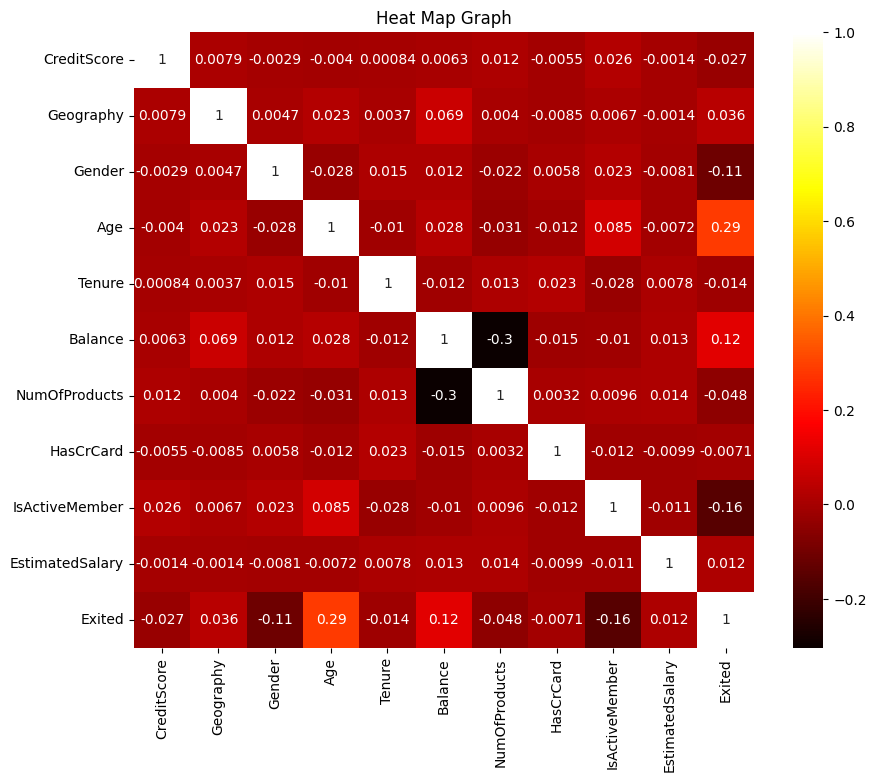

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data=correlation,cmap='hot',annot=True)
plt.title('Heat Map Graph')

# **New Data Frame**

In [ ]:
bank_3 = bank_2.copy()

In [ ]:
bank_3.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


# **Defined Features (x) and Target (y) Variables**

In [ ]:
x = bank_3.drop(columns='Exited',axis=1)

In [ ]:
y = bank_3['Exited']

# **Import Train-Test-Split Model**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=4596)

# **Import Logistics Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

*Train and Fit the Model*

In [ ]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

*Model Intercept*

In [ ]:
model.intercept_

array([-0.00020028])

*Model Coefficient*

In [ ]:
model.coef_

array([[-4.98665382e-03,  3.40484929e-04, -1.03662376e-03,
         4.33090917e-02, -1.06463942e-03,  3.50956708e-06,
        -4.45465913e-04, -1.93788382e-04, -1.43639124e-03,
        -1.38746535e-06]])

*Model Predict*

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

*Model Evaluation and Accuracy*

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_test,y_pred)

0.793

In [ ]:
confusion_matrix(y_test,y_pred)

array([[1560,   34],
       [ 380,   26]])

# **Import Random Forest Classification Algorithms**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier()

*Forest_Model Train and Fit*

In [ ]:
forest_model.fit(x_train,y_train)

RandomForestClassifier()

*Forest_model Predict*

In [ ]:
y_forest_pred = forest_model.predict(x_test)

In [ ]:
y_forest_pred

array([0, 0, 0, ..., 0, 0, 1])

*Forest_Model Evaluation and Accuracy*

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_test,y_forest_pred)

0.8615

In [ ]:
confusion_matrix(y_test,y_forest_pred)

array([[1538,   56],
       [ 221,  185]])

# **Import Gradient Boosting Algorithms**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
boost_model = GradientBoostingClassifier(max_leaf_nodes=8,random_state=191)

*boost_model Train and Fit*

In [ ]:
boost_model.fit(x_train,y_train)

GradientBoostingClassifier(max_leaf_nodes=8, random_state=191)

*boost_model Predict*

In [ ]:
y_boost_pred = boost_model.predict(x_test)

In [ ]:
y_boost_pred

array([0, 0, 0, ..., 0, 0, 1])

*boost_model Evaluation and Accuracy*

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_test,y_boost_pred)

0.8625

In [ ]:
confusion_matrix(y_test,y_boost_pred)

array([[1545,   49],
       [ 226,  180]])

# **Import Decision Tree Classification Algorithms**

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
tree_model = DecisionTreeClassifier(max_leaf_nodes=8,random_state=42)

*tree_model Train and Fit*

In [ ]:
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=8, random_state=42)

*tree_model Predict*

In [ ]:
y_tree_pred = tree_model.predict(x_test)

In [ ]:
y_tree_pred

array([0, 0, 0, ..., 0, 0, 0])

*tree_model Evaluation and Accuracy*

In [ ]:
from sklearn.metrics import accuracy_score,consensus_score,precision_score,recall_score,f1_score

In [ ]:
accuracy_score(y_test,y_tree_pred)

0.838

In [ ]:
confusion_matrix(y_test,y_tree_pred)

array([[1546,   48],
       [ 276,  130]])

# **Plot Decision Tree Graph**

In [ ]:
bank_3['Exited'].replace({1:'Exit',0:'Not Exit'},inplace=True)

In [ ]:
from sklearn import tree

In [ ]:
bank_3.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

Text(0.5, 1.0, 'Decision Tree Plot')

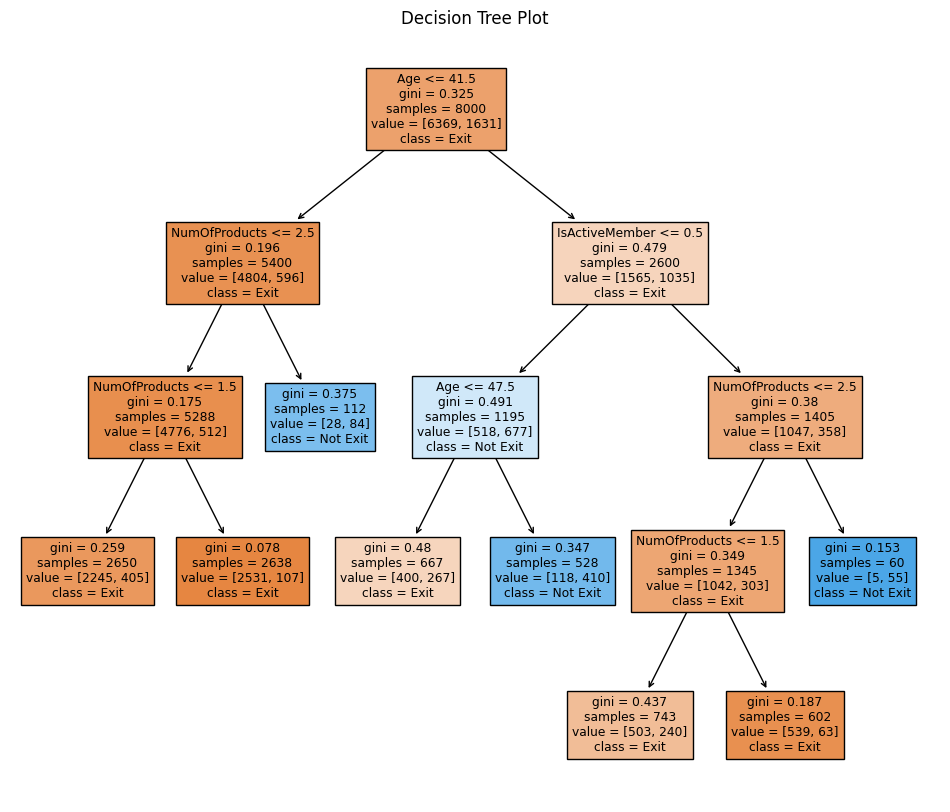

In [ ]:
plt.figure(figsize=(12,10))
tree.plot_tree(tree_model,feature_names=bank_3.columns,class_names=bank_3['Exited'],filled=True,impurity=True)
plt.title('Decision Tree Plot')

# **Project Conclusion**

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [ ]:
#conclusion = pd.DataFrame(index=['Logistics Regression','Random Forest','Gradient Boosting','Decision Tree'],columns=['Accuracy Score in %','Precision Score in %','Recall Score in %','F1 Score in %'],data=[[79,43,6,11],[86,76,44,56],[86,78,44,56],[83,73,32,44]])

In [ ]:
conclusion = pd.DataFrame(index=['Logistics Regression','Random Forest','Gradient Boosting','Decision Tree'],data={'Accuracy Score':[79,86,86,83],'Precision Score':[43,76,78,73],'Recall Score':[6,44,44,32],'F1 Score':[11,56,56,44]})

In [ ]:
conclusion

,Accuracy Score,Precision Score,Recall Score,F1 Score
Logistics Regression,79,43,6,11
Random Forest,86,76,44,56
Gradient Boosting,86,78,44,56
Decision Tree,83,73,32,44
